In [5]:
%load_ext autoreload
%autoreload 2

from src.models.trace_guide import TraceGuide
from src.models.initial_model import InitialModel
from src.models.wifi_model import WifiModel
from src.models.beacon_model import BeaconModel
from src.data.datasets import FloorDataset
from src.utils import object_to_markdown

from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
import torch

site_id = "5d2709b303f801723c327472"
floor_id = "1F"

floor_data = FloorDataset(site_id, floor_id, wifi_threshold=400, sampling_interval=100)
floor_data_beacon = FloorDataset(site_id, floor_id, wifi_threshold=400, sampling_interval=100, include_beacon=True)
sns.set(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#display(object_to_markdown(InitialModel.guide))

In [7]:
mini_batch_beacon = floor_data_beacon[torch.arange(17, 21)]


100%|██████████| 240/240 [00:01<00:00, 177.44it/s]


AttributeError: 'list' object has no attribute 'to'

In [8]:
mini_batch = floor_data[torch.arange(1, 21)]
mini_batch_index = mini_batch[0]
mini_batch_length = mini_batch[1]
mini_batch_time = mini_batch[2]
mini_batch_position = mini_batch[3]
mini_batch_position_mask = mini_batch[4]
mini_batch_wifi = mini_batch[5]
mini_batch_wifi_mask = mini_batch[6]

In [15]:
initial_model = WifiModel(floor_data)
checkpoint_initial = torch.load("../checkpoints/wifi_model.pt",  map_location=torch.device('cpu'))
#torch.manual_seed(123)
initial_model.load_state_dict(checkpoint_initial["model_state_dict"])
c_epoch = checkpoint_initial["current_epoch"]
print(f"Initial model, current epoch = {c_epoch}")

plt.figure(figsize=(4,4))
plt.plot(checkpoint_initial["loss_history"])
plt.xlabel("Epoch")
plt.ylabel("Loss (Negative ELBO)")
title="Initial Model"
plt.title(title)
plt.show()

plot_trace_result(initial_model, title)

RuntimeError: Error(s) in loading state_dict for WifiModel:
	size mismatch for mu_q: copying a param with shape torch.Size([960]) from checkpoint, the shape in current model is torch.Size([613]).
	size mismatch for log_sigma_q: copying a param with shape torch.Size([960]) from checkpoint, the shape in current model is torch.Size([613]).
	size mismatch for wifi_location_q: copying a param with shape torch.Size([960, 2]) from checkpoint, the shape in current model is torch.Size([613, 2]).
	size mismatch for wifi_location_log_sigma_q: copying a param with shape torch.Size([960, 2]) from checkpoint, the shape in current model is torch.Size([613, 2]).

Initial model, current epoch = 520


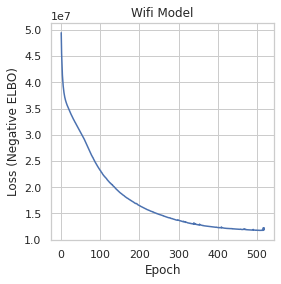

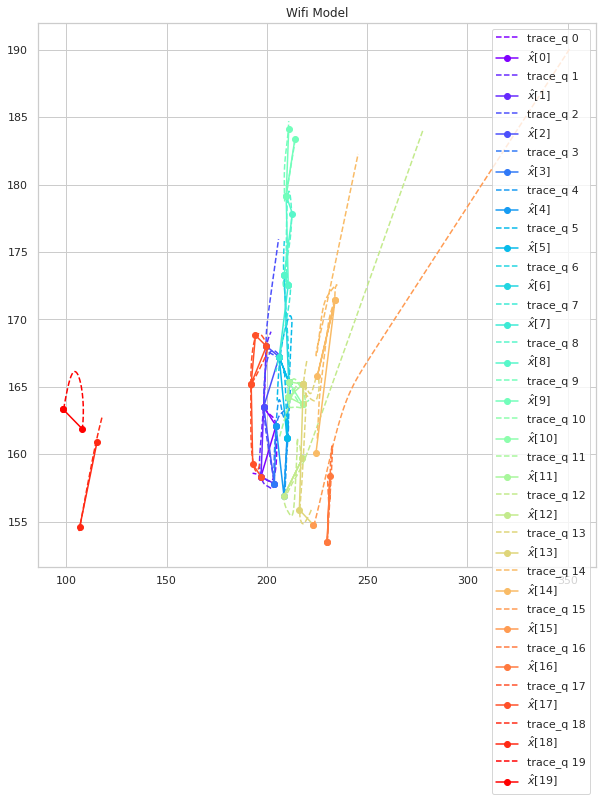

In [31]:
wifi_model = WifiModel(floor_data)
checkpoint_wifi = torch.load("../checkpoints/wifi_model.pt")
#torch.manual_seed(123)
wifi_model.load_state_dict(checkpoint_wifi["model_state_dict"])
c_epoch = checkpoint_wifi["current_epoch"]
print(f"Initial model, current epoch = {c_epoch}")

plt.figure(figsize=(4,4))
plt.plot(checkpoint_wifi["loss_history"])
plt.xlabel("Epoch")
plt.ylabel("Loss (Negative ELBO)")
title = "Wifi Model"
plt.title(title)
plt.show()

plot_trace_result(wifi_model, title)

Initial model, current epoch = 610


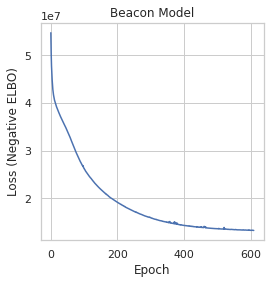

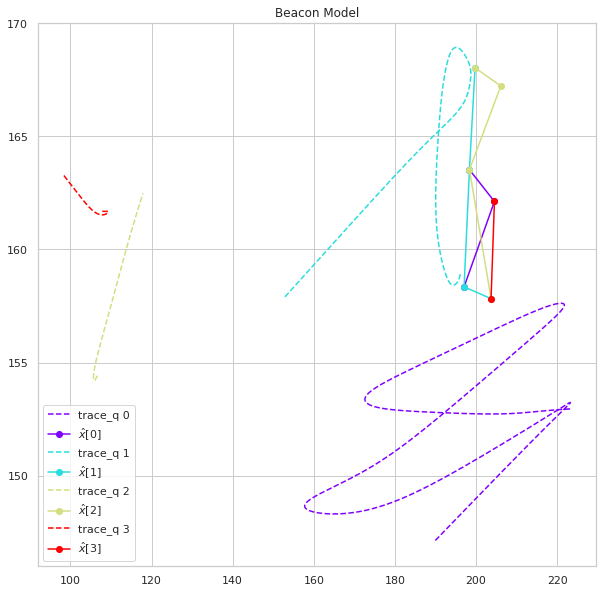

In [32]:
beacon_model = BeaconModel(floor_data_beacon)
checkpoint_beacon = torch.load("../checkpoints/beacon_model.pt")
#torch.manual_seed(123)
beacon_model.load_state_dict(checkpoint_beacon["model_state_dict"])
c_epoch = checkpoint_beacon["current_epoch"]
print(f"Initial model, current epoch = {c_epoch}")

plt.figure(figsize=(4,4))
plt.plot(checkpoint_beacon["loss_history"])
plt.xlabel("Epoch")
plt.ylabel("Loss (Negative ELBO)")
title="Beacon Model"
plt.title(title)
plt.show()

plot_trace_result(beacon_model, title, beacon=True)

In [12]:
import matplotlib.cm as cm
import numpy as np

def plot_trace_result(model,title, beacon = False):
    with torch.no_grad():
        if beacon:
            loc_q, scale_q = model.guide(*mini_batch_beacon)
        else:
            loc_q, scale_q = model.guide(*mini_batch)
        
    loc_q[loc_q == 0] = torch.tensor(float('nan'))

    plt.figure(figsize=(10,10))
    colors = cm.rainbow(np.linspace(0, 1, loc_q.shape[0]))
    for i, c in enumerate(colors):
        xhat = mini_batch_position[i,mini_batch_position_mask[i],:]
        
        plt.plot(*loc_q[i].T, label=f"trace_q {i}",linestyle='dashed', color = c)
        plt.plot(*xhat.T, "-o", label = r"$\hat{x}$"+f"[{i}]", color = c)
    plt.legend()
    plt.title(title)
    plt.show()

In [12]:
xhat

tensor([[106.6590, 154.6295],
        [115.2423, 160.8975]], dtype=torch.float64)